In [15]:
pip install arch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
from datetime import datetime
from pandas import to_timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import yfinance as yf
from statsmodels.tsa.stattools import adfuller


retrieve stock

In [17]:
index = 'MSFT'
start_date = '2000-01-01'
end_date = '2024-06-03'
data = yf.download(index, start=start_date, end=end_date, progress=False)

data

/home/success/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,58.687500,59.312500,56.000000,58.281250,36.065575,53228400
2000-01-04,56.781250,58.562500,56.125000,56.312500,34.847263,54119000
2000-01-05,55.562500,58.187500,54.687500,56.906250,35.214687,64059600
2000-01-06,56.093750,56.937500,54.187500,55.000000,34.035072,54976600
2000-01-07,54.312500,56.125000,53.656250,55.718750,34.479847,62013600
...,...,...,...,...,...,...
2024-05-06,408.760010,413.929993,406.369995,413.540009,413.540009,16996600
2024-05-07,414.660004,414.670013,409.089996,409.339996,409.339996,20018200
2024-05-08,408.170013,412.230011,406.709991,410.540009,410.540009,11792300


In [18]:
from time import perf_counter
import numpy as np
indiceMSFT = data['Adj Close']

start  = perf_counter()
V = indiceMSFT.values[1:] - indiceMSFT.values[:-1]
V = np.concatenate([V, [0]])

end= perf_counter()

print(V, '\n', end - start)

[-1.21831131  0.36742401 -1.17961502 ...  1.77999878  2.41998291
  0.        ] 
 0.001448176997655537


In [19]:
indiceMSFT = data['Adj Close']

start = perf_counter()
S = indiceMSFT - indiceMSFT.shift(1)
end = perf_counter()
print(S.head(), '\n', end - start)

Date
2000-01-03         NaN
2000-01-04   -1.218311
2000-01-05    0.367424
2000-01-06   -1.179615
2000-01-07    0.444775
Name: Adj Close, dtype: float64 
 0.0029108500020811334


Analyze the time serie

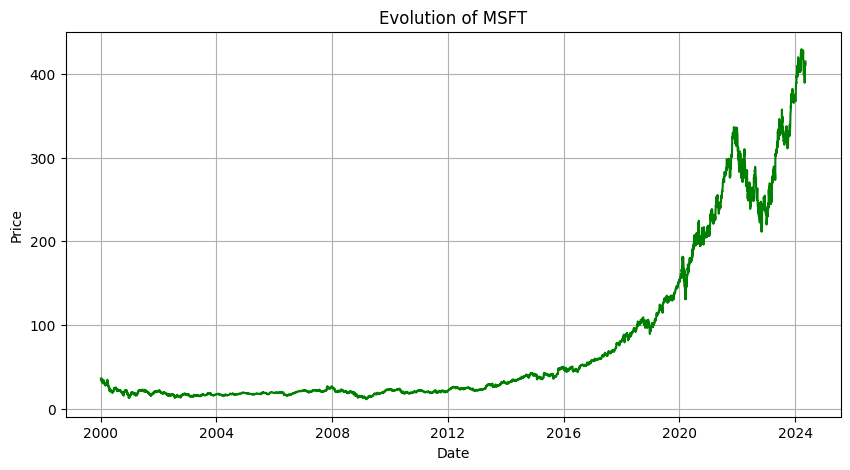

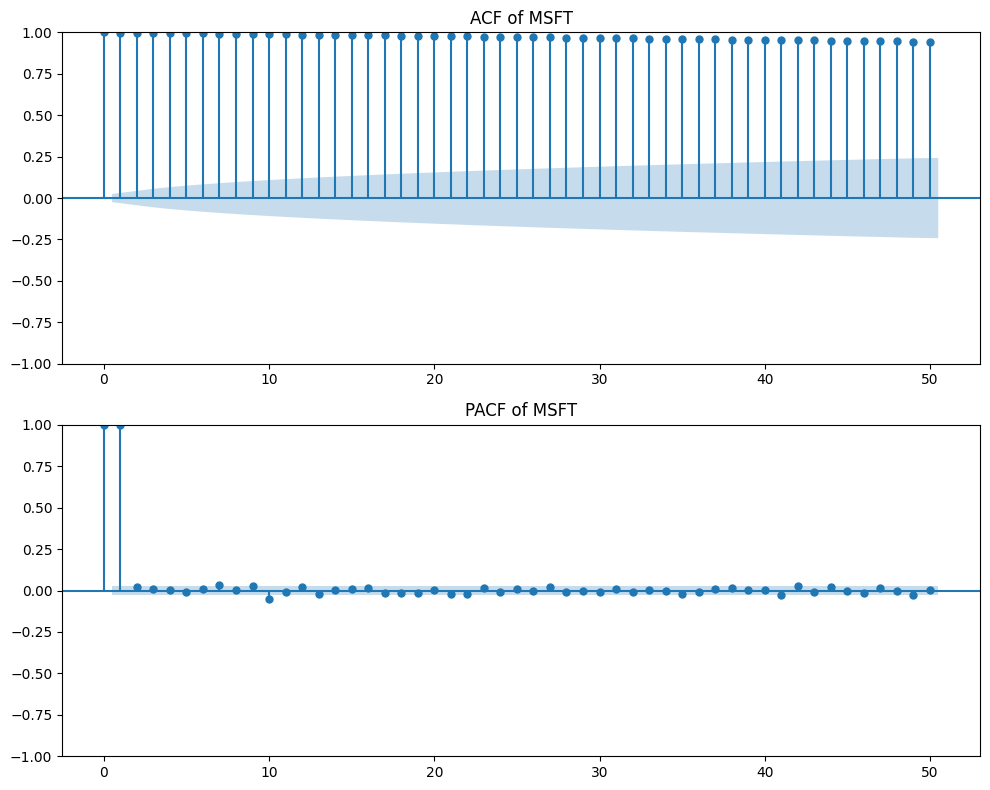

In [20]:
indiceMSFT = data['Adj Close']

#display the evolution of MSFT
plt.figure(figsize=(10,5))
plt.plot(indiceMSFT.index, indiceMSFT, color='green')
plt.title('Evolution of MSFT')
plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(True)
plt.show()

#Draw ACF and PACF of returns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
#ACF
plot_acf(indiceMSFT, lags=50, ax = ax1)
ax1.set_title('ACF of MSFT')
#PACF
plot_pacf(indiceMSFT, lags=50, ax=ax2)
ax2.set_title('PACF of MSFT')
plt.tight_layout()
plt.show()


the time serie has white noise from PACF and has a tendency to dicrease from ACF

return formula :  



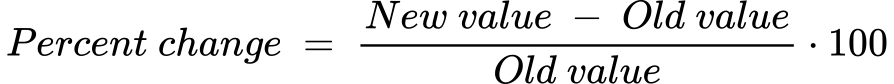


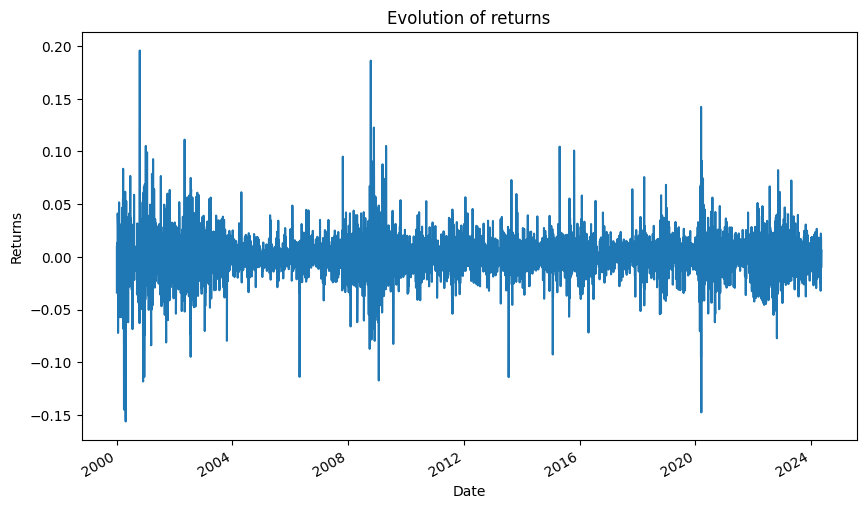

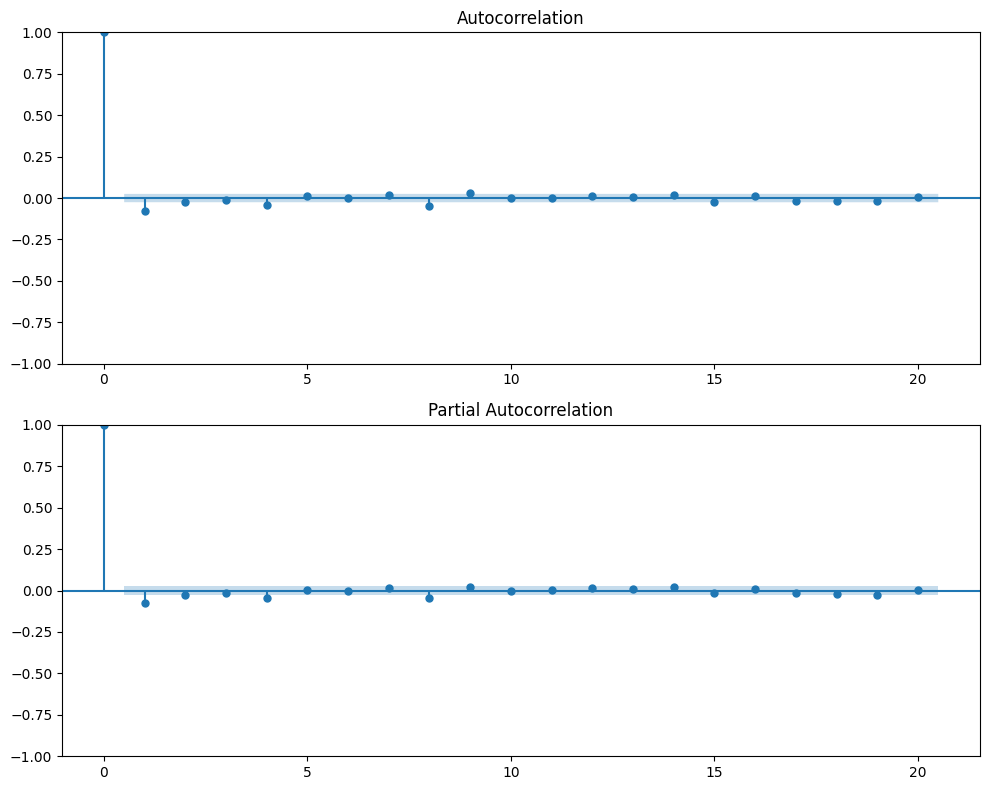

In [21]:
returns = data['Adj Close'].pct_change().dropna()

returns.plot(figsize=(10,6))
plt.title('Evolution of returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

#Calculate ACF and PACF
fig, ax = plt.subplots(nrows=2, figsize=(10,8))
plot_acf(returns, ax = ax[0], lags=20, alpha=0.05)
plot_pacf(returns, ax=ax[1], lags=20, alpha=0.05)
plt.tight_layout()
plt.show()


In [22]:
#test stationnarity dickey-fuller (ADF)
result = adfuller(returns)
print('Statistic of test ADF:', result[0])
print('Critic value of 1%:', result[4]['1%'])
print('Critic value of 5%:', result[4]['5%'])
print('Critic value of 10%:', result[4]['10%'])
print('P-value:',  result[1])
print('Is it stationnary ?', 'Yes' if result[1] < 0.05 else 'Non')

Statistic of test ADF: -27.075952814773093
Critic value of 1%: -3.4314193111849085
Critic value of 5%: -2.8620125389221904
Critic value of 10%: -2.567021529770672
P-value: 0.0
Is it stationnary ? Yes


We realise by observation that ACF and PACF of Microsoft returns are a white noise, and the returns have a high volatility from that. 
We need to analysis the squared returns.

Analysis squared returns

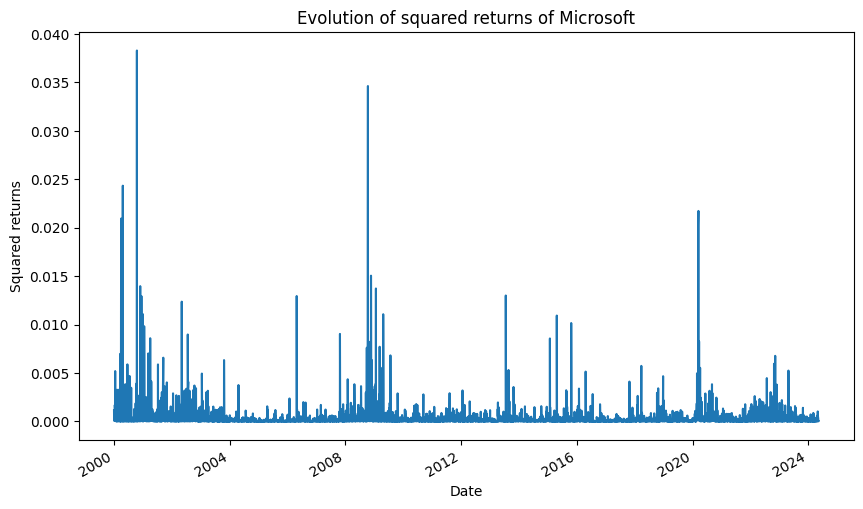

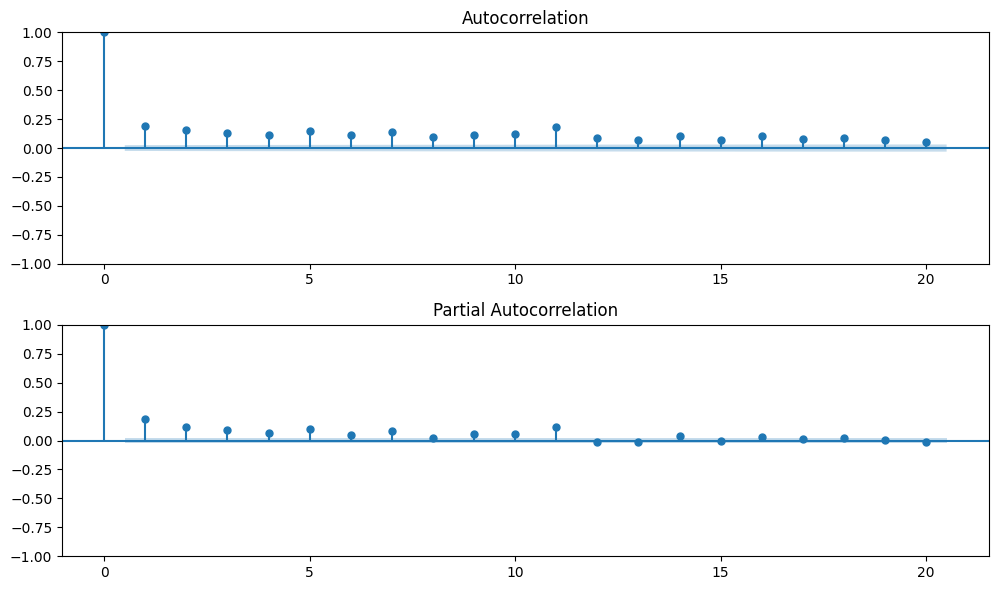

In [23]:
returns_squared = returns ** 2
returns_squared.plot(figsize=(10,6))
plt.title("Evolution of squared returns of Microsoft")
plt.xlabel("Date")
plt.ylabel("Squared returns")
plt.show()

#Calculate of ACF et PACF of squared returns 
fig, ax = plt.subplots(nrows=2, figsize=(10,6))
plot_acf(returns_squared, ax=ax[0], lags=20, alpha=0.05)
plot_pacf(returns_squared, ax=ax[1], lags=20, alpha=0.05)

plt.tight_layout()
plt.show()

We realise by observation that ACF and PACF of Microsoft returns are a white noise, and the returns have a high volatility from that. 
We need to analysis the squared returns.

We realise by observation that ACF and PACF of Microsoft returns are a white noise, and the returns have a high volatility from that. 
We need to analysis the squared returns.

GARCH

In [24]:
data['Return'] = data['Adj Close'].pct_change()
data['Squared_Return'] = data['Return'] ** 2
data  = data.dropna()

In [25]:
p_range = range(1, 4)
q_range = range(1, 4)

results_df = pd.DataFrame(columns=['p', 'q', 'aic'])

for p in range(1, 4):
    for q in range(1,4):
        #Specialize the model GARCH
        model = arch_model(data['Return'], vol='GARCH', p=p, q=q)

        # Adapt the model
        results = model.fit(disp='off')

        aic = results.aic
        results_df.loc[len(results_df)] = [p, q, aic]

/home/success/.local/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003675. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/success/.local/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003675. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/success/.local/lib/python3.10/site-packages/arch/univari

In [26]:
print(type(results_df))


<class 'pandas.core.frame.DataFrame'>


In [27]:
#Display results
print(results_df.sort_values(by='aic'))

     p    q           aic
1  1.0  2.0 -32915.319709
0  1.0  1.0 -32911.531524
2  1.0  3.0 -32910.964914
4  2.0  2.0 -32903.838678
5  2.0  3.0 -32898.969372
3  2.0  1.0 -32888.265448
7  3.0  2.0 -32881.390732
8  3.0  3.0 -32880.606927
6  3.0  1.0 -32866.070005


In [29]:
model = arch_model(data['Return'], vol='Garch', p =3, q =0)
results = model.fit()
print(results.summary())

/home/success/.local/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003675. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      7,   Neg. LLF: 7.34020280386776e+20
Iteration:      2,   Func. Count:     20,   Neg. LLF: -15927.09147489105
Optimization terminated successfully    (Exit mode 0)
            Current function value: -15927.09144632963
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 2
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                15927.1
Distribution:                  Normal   AIC:                          -31844.2
Method:            Maximum Likelihood   BIC:                          -31810.6
                                        No. Observations:                 6127
Date:                Mon, May 13 2024   Df Residuals:                     6126
Time:       

Model Validation

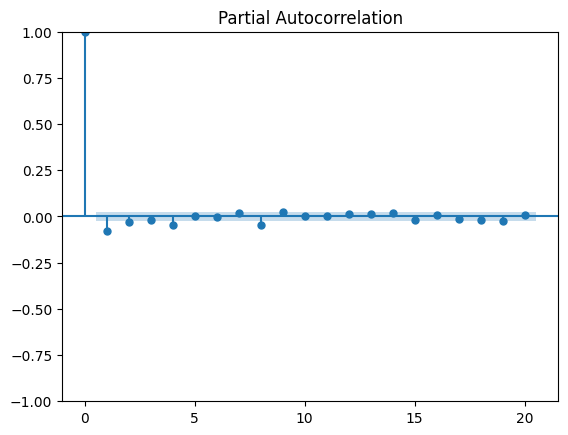

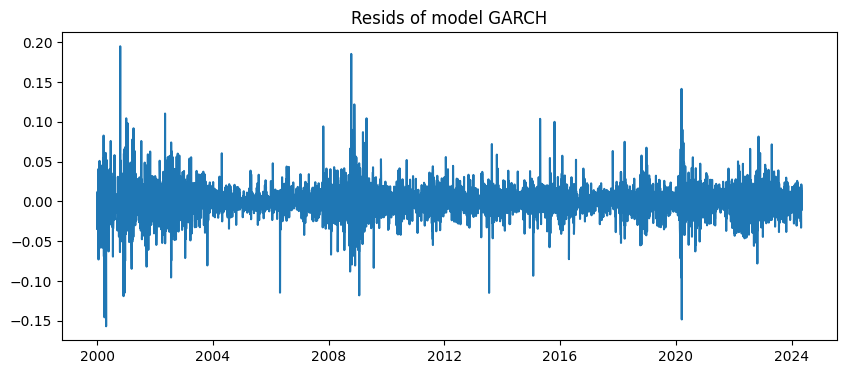

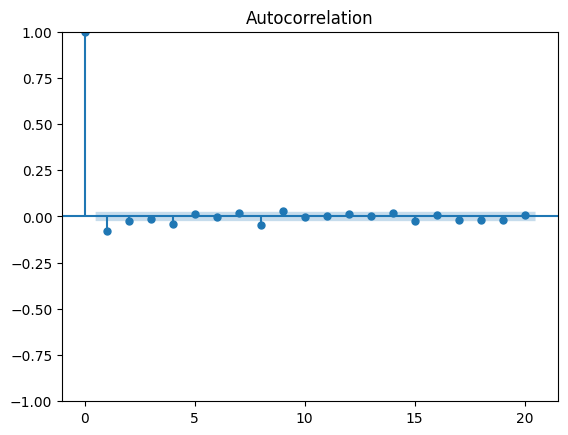

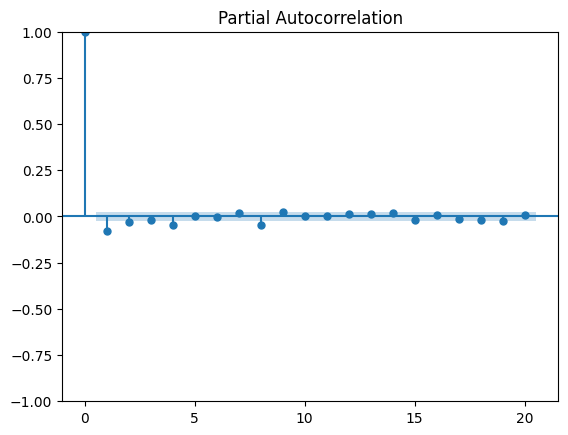

In [30]:
plt.figure(figsize=(10,4))
plt.plot(results.resid)
plt.title("Resids of model GARCH")

#ACF PACF
plot_acf(results.resid, lags=20)
plot_pacf(results.resid, lags=20)
